In [1]:
# Step 5: 05_evaluation_metrics.ipynb

# GOAL: Aggregate and visualize the classification results across all feature combinations.

# TASKS
# Create side-by-side comparisons of accuracy, precision, recall, and F1-score.
# Create charts summarizing model performance.

In [2]:
import os 
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report 

In [3]:
# set up configuration
MODEL_DIR = "../models"
REPORT_SUFFIX = "_report.txt"
COMBO_REGEX = r"(.+)_report\.txt"

In [4]:
# get all report files 
report_files = [f for f in os.listdir(MODEL_DIR) if f.endswith(REPORT_SUFFIX)]

In [5]:
# create an array to store the results 
results = []

In [6]:
# loop through each report file
for report_file in report_files: 
    combo_match = re.match(COMBO_REGEX, report_file)
    if not combo_match: 
        continue

    combo_name = combo_match.group(1)
    report_path = os.path.join(MODEL_DIR, report_file)

    with open(report_path, "r") as f: 
        lines = f.readlines()

    # parse the classification report manually 
    in_class_selection = False
    for line in lines: 
        parts = line.strip().split()
        if len(parts) == 5 and parts[0] not in ("accuracy", "macro", "weighted"): 
            label, prec, rec, f1, support = parts
            results.append({
                "Combo": combo_name,
                "Label": label, 
                "Precision": float(prec), 
                "Recall": float(rec), 
                "F1": float(f1), 
                "Support": int(support)
            })

# create a DataFrame
df = pd.DataFrame(results)

# preview
#df.head(13)

df

,Combo,Label,Precision,Recall,F1,Support
0,hog_edge,crazing,0.69,0.95,0.80,60
1,hog_edge,inclusion,0.76,0.48,0.59,60
2,hog_edge,patches,0.81,0.63,0.71,60
3,hog_edge,pitted_surface,0.53,0.47,0.50,60
4,hog_edge,rolled-in_scale,0.59,0.92,0.72,60
5,hog_edge,scratches,0.41,0.32,0.36,60
6,raw,crazing,0.35,0.12,0.17,60
7,raw,inclusion,0.27,0.32,0.29,60
8,raw,patches,0.53,0.67,0.59,60
9,raw,pitted_surface,0.25,0.32,0.28,60


In [7]:
# average the performance of each combo
avg_df = df.groupby("Combo")[["Precision", "Recall", "F1"]].mean().reset_index()
avg_df = avg_df.sort_values("F1", ascending=False)

# show table
import IPython.display as display
display.display(avg_df.round(2))

,Combo,Precision,Recall,F1
4,hog_pca,0.76,0.75,0.75
3,hog_edge_pca,0.73,0.73,0.72
1,hog,0.65,0.64,0.63
2,hog_edge,0.63,0.63,0.61
0,edge,0.36,0.34,0.34
5,raw,0.34,0.32,0.30


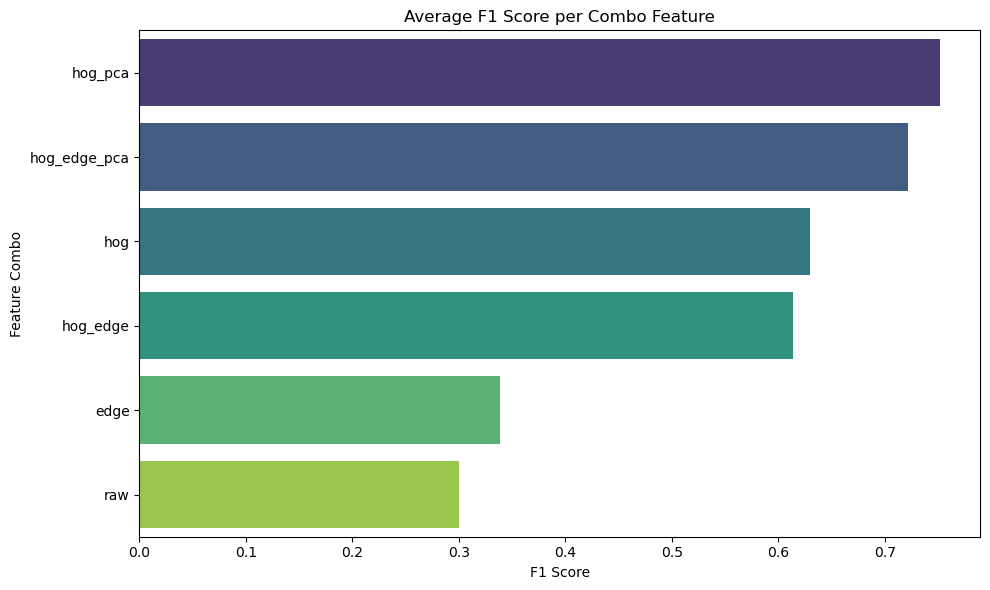

In [8]:
# create a mean F1-score comparison
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_df, x="F1", y="Combo", hue="Combo", palette="viridis", legend=False)
plt.title("Average F1 Score per Combo Feature")
plt.xlabel("F1 Score")
plt.ylabel("Feature Combo")
plt.tight_layout()
plt.show()

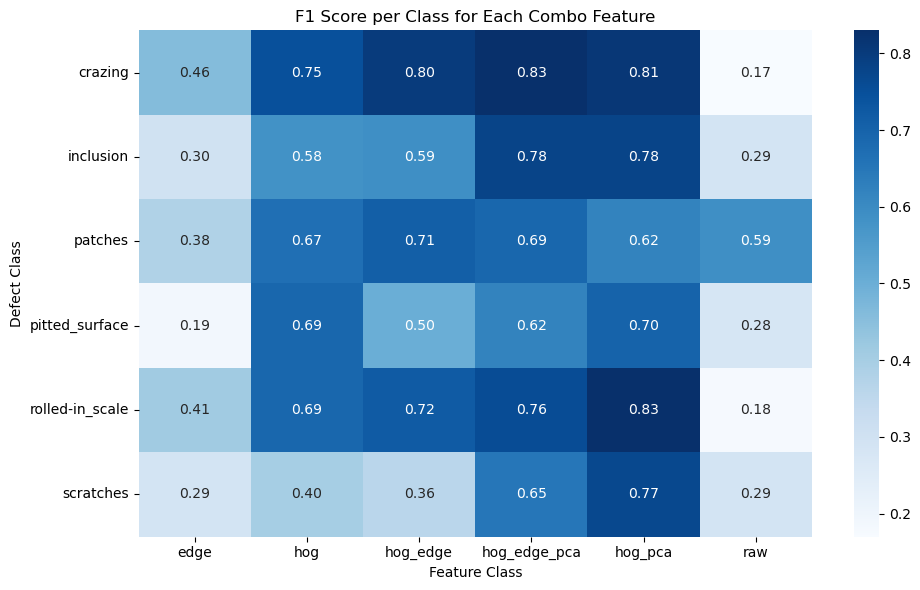

In [9]:
# create an F1 heatmap per class
pivot_df = df.pivot_table(index="Label", columns="Combo", values="F1")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, fmt=".2f", cmap="Blues")
plt.title("F1 Score per Class for Each Combo Feature")
plt.xlabel("Feature Class")
plt.ylabel("Defect Class")
plt.tight_layout()
plt.show()

In [10]:
# print the best performing combo
best_combo = avg_df.iloc[0]["Combo"]
print(f"✅ Best performing combo: {best_combo}")

✅ Best performing combo: hog_pca
